When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision –

If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank
Objective of Analysis:

Minimization of risk and maximization of profit on behalf of the bank.

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding who to give approval of the loan and who not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.

The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants.  

A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

### Dataset: german.numer
### Data analysis weight: from the data description it said that there are much more weight for false positive (5x) than false negative (1x). The model should try its best not to wrongly categorize a good credit customer to be bad. Therefore, I think the essential weighted metrics I'll use here would be Precision or Total Penalty (5xFP + 1xFN), then accuracy.
### Business goal: find the best ML model or models to predictively categorize customers to corrct credit score bucket, i.e. Good or Bad, prone to default or not, based on available relevant data

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
cols = [chr(i) for i in range(ord('A'),ord('A')+25)]

In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric', 
            sep='\s+', header=None, names=cols, index_col=None)
df

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
5,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,1
6,4,24,2,28,3,5,3,4,2,53,...,0,0,1,0,0,1,0,0,1,1
7,2,36,2,69,1,3,3,2,3,35,...,0,1,1,0,1,0,0,0,0,1
8,4,12,2,31,4,4,1,4,1,61,...,0,0,1,0,0,1,0,1,0,1
9,2,30,4,52,1,1,4,2,3,28,...,1,0,1,0,0,1,0,0,0,2


In [85]:
df['Y'].replace({1:0,2:1},inplace=True)
df

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1
5,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,0
6,4,24,2,28,3,5,3,4,2,53,...,0,0,1,0,0,1,0,0,1,0
7,2,36,2,69,1,3,3,2,3,35,...,0,1,1,0,1,0,0,0,0,0
8,4,12,2,31,4,4,1,4,1,61,...,0,0,1,0,0,1,0,1,0,0
9,2,30,4,52,1,1,4,2,3,28,...,1,0,1,0,0,1,0,0,0,1


# Statistics and data analysis to understand the data

In [4]:
# Find unique values in each feature
for col in df.columns:
    print(col,": ", df[col].unique())

A :  [1 2 4 3]
B :  [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
C :  [4 2 3 0 1]
D :  [ 12  60  21  79  49  91  28  69  31  52  13  43  16  14  24  81 126  34
  26  22  18   4  68  19  40  59  15  47  61   5  23  62  72   8  65  96
  20 144  32  10   7  48  94  38  11   6  36 159  71   9 119  77  63  17
  39  35  85  27 101  86  25  54  58  78  70   3  29  73  30  75  45  51
  46 106  66  53  33 110  42 146  74  90 122 120 107  76  64 100  55  37
  44 116  41  57 138 148 143 130 118 113 111  83  80  89  50 124  92 157
 102 104  56  99 140   2 142 127  93  67 109 105 184 149 103  84  82]
E :  [5 1 3 4 2]
F :  [5 3 4 1 2]
G :  [3 2 1 4]
H :  [4 2 3 1]
I :  [1 2 4 3]
J :  [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
K :  [3 1 2]
L :  [2 1 3 4]
M :  [1 2]
N :  [2 1]
O :  [1 2]
P :  [0 1]
Q :  [0 1]
R :  [1 0]
S :  [0

Most of the columns, although converted to numeric, are actually encoded categorical data, except column 'B', 'D' and 'J'

In [5]:
# Convert ordinal data to categorical data to save memory imprint
categorical_cols = ['A','C','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
len(categorical_cols)

22

In [6]:
df[categorical_cols] = df[categorical_cols].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
A    1000 non-null category
B    1000 non-null int64
C    1000 non-null category
D    1000 non-null int64
E    1000 non-null category
F    1000 non-null category
G    1000 non-null category
H    1000 non-null category
I    1000 non-null category
J    1000 non-null int64
K    1000 non-null category
L    1000 non-null category
M    1000 non-null category
N    1000 non-null category
O    1000 non-null category
P    1000 non-null category
Q    1000 non-null category
R    1000 non-null category
S    1000 non-null category
T    1000 non-null category
U    1000 non-null category
V    1000 non-null category
W    1000 non-null category
X    1000 non-null category
Y    1000 non-null category
dtypes: category(22), int64(3)
memory usage: 47.8 KB


In [8]:
df.describe()

,B,D,J
count,1000.000000,1000.000000,1000.000000
mean,20.903000,32.711000,35.546000
std,12.058814,28.252605,11.375469
min,4.000000,2.000000,19.000000
25%,12.000000,14.000000,27.000000
50%,18.000000,23.000000,33.000000
75%,24.000000,40.000000,42.000000
max,72.000000,184.000000,75.000000


/anaconda3/envs/base_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/envs/base_py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

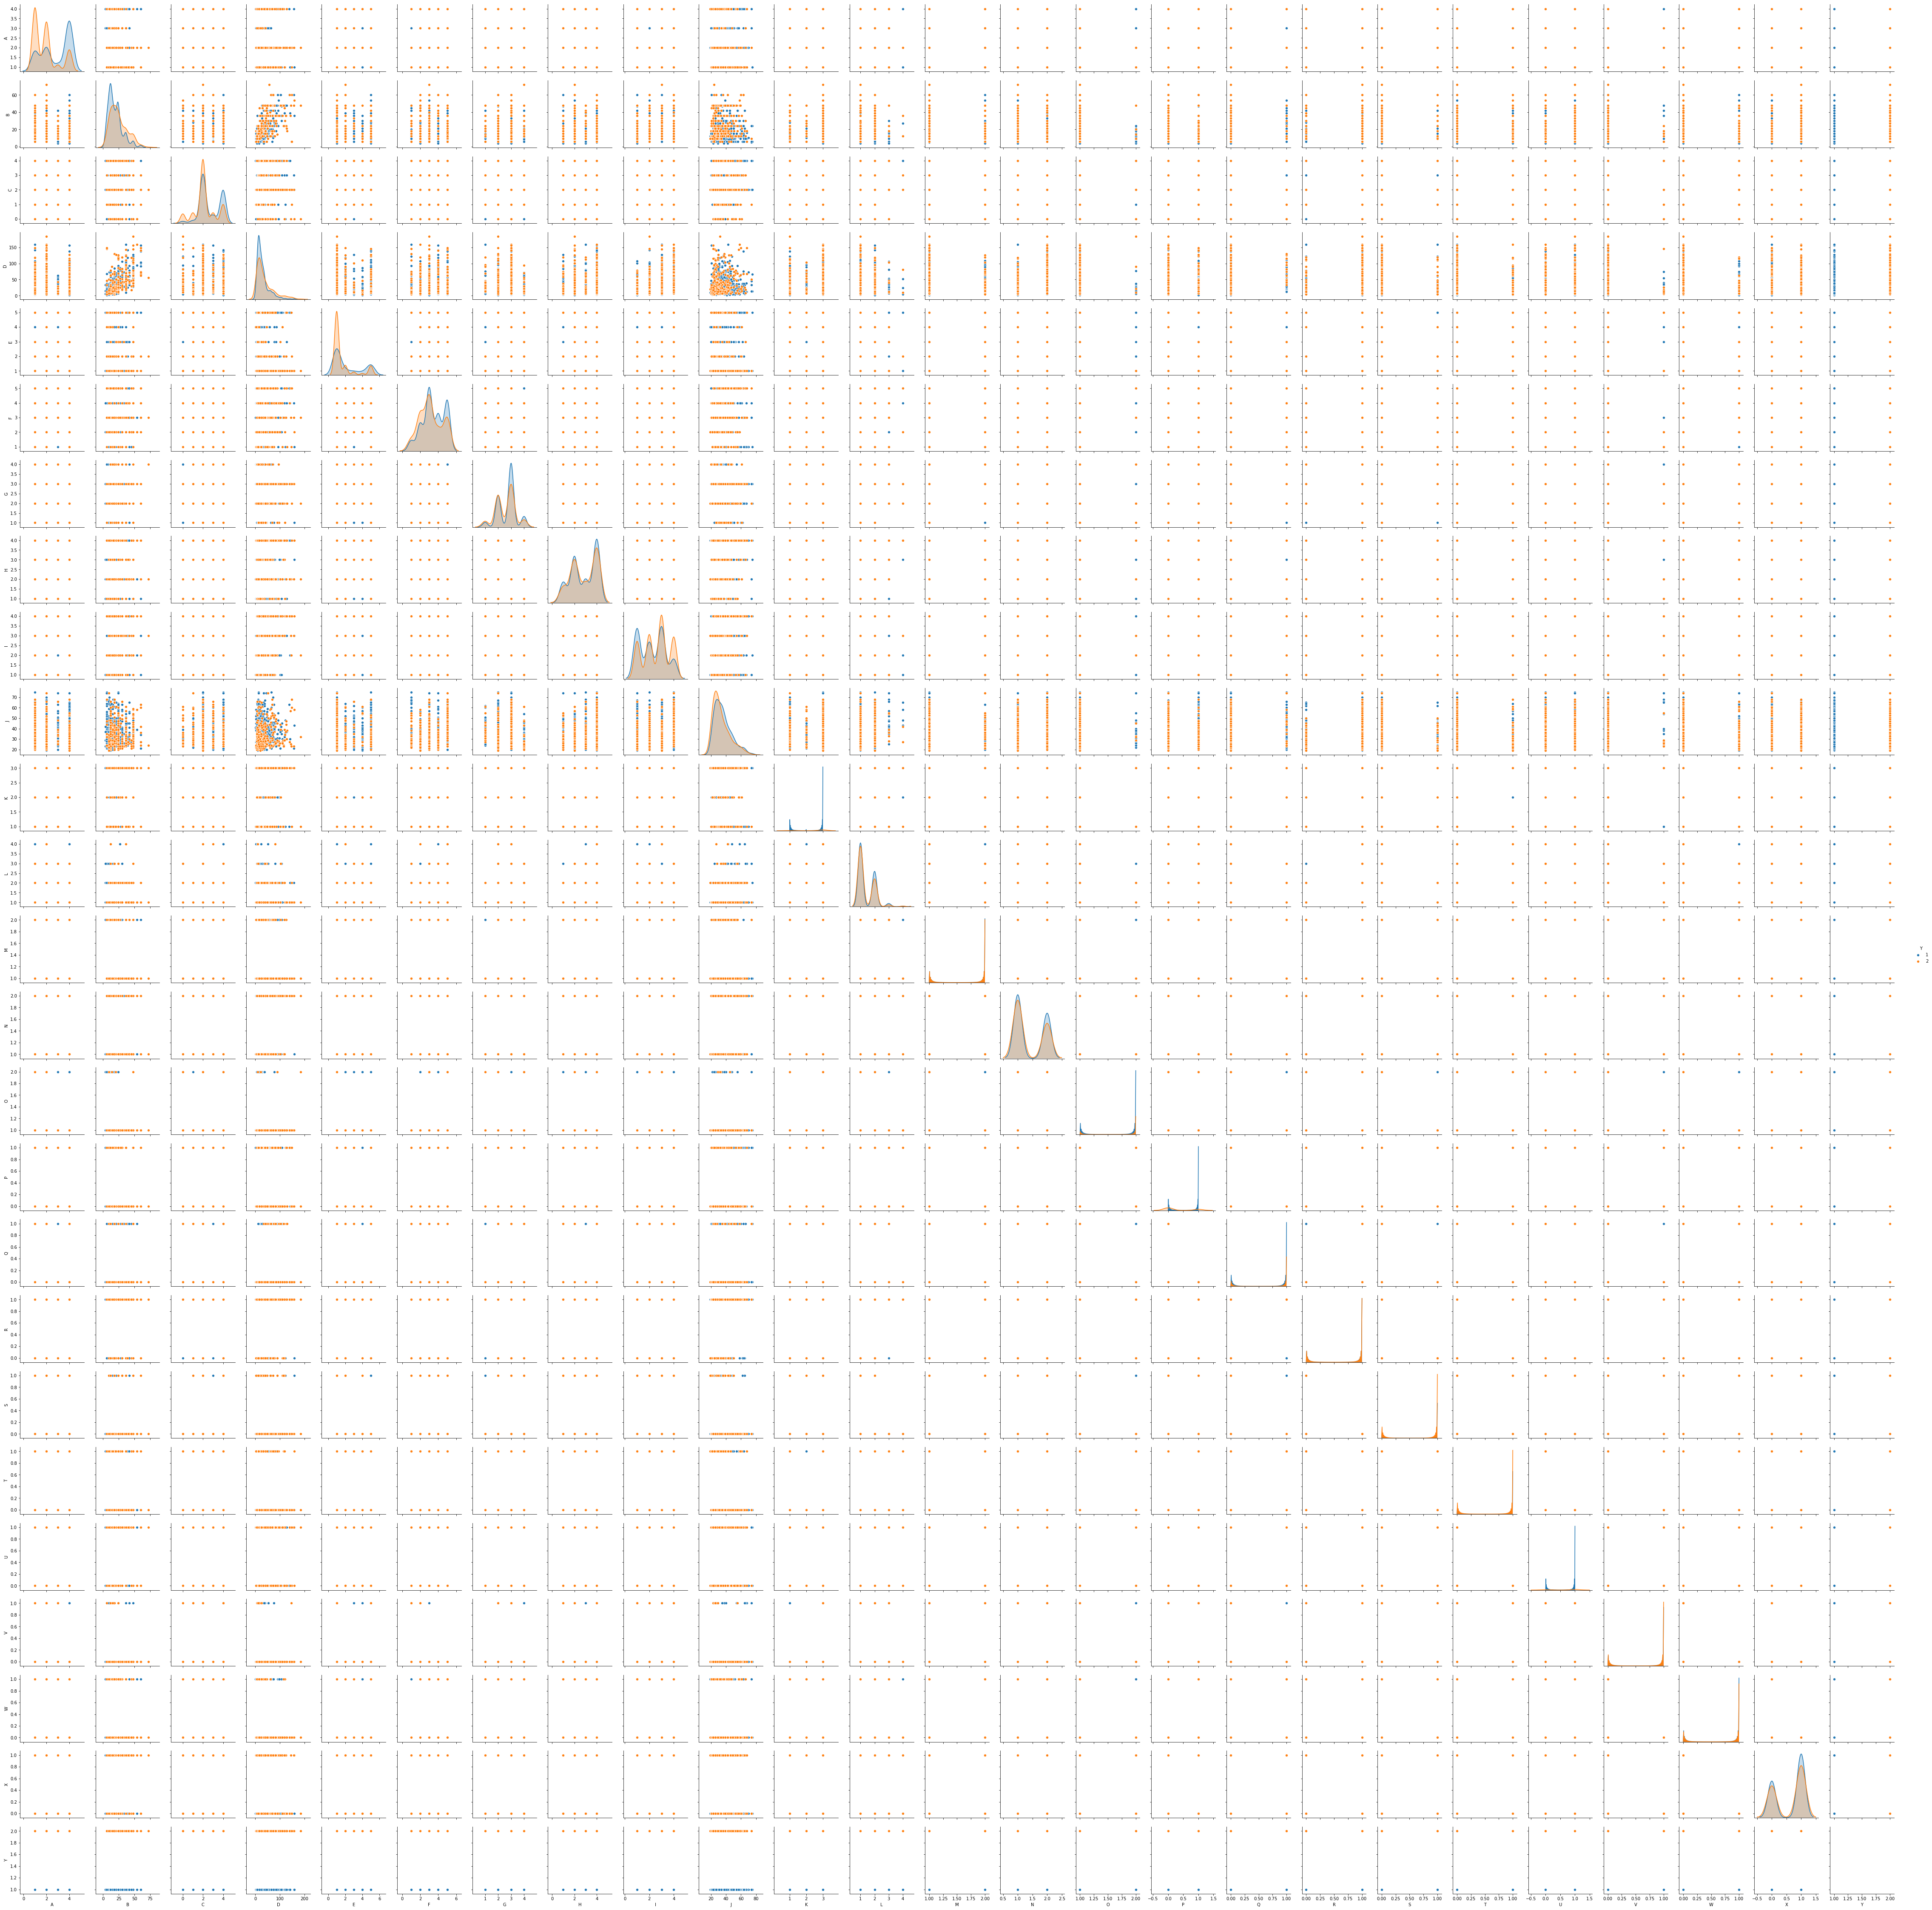

In [10]:
# pairplot to find trends and patterns within and between features
sns.pairplot(df, hue='Y')

From the pairplot above, it seems that there are some columns that can better differentiate good vs bad (blue vs orange). I'll plot each feature one by one grouped by outcome

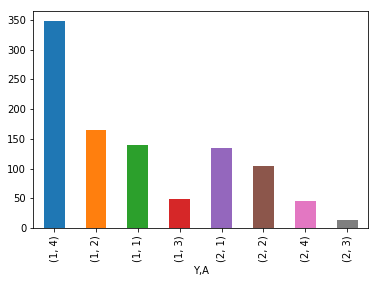

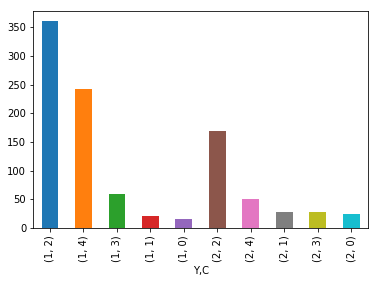

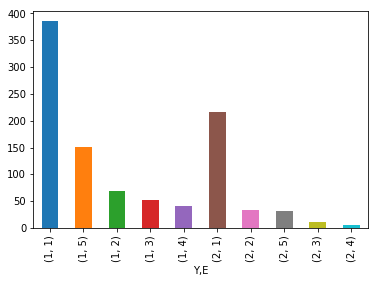

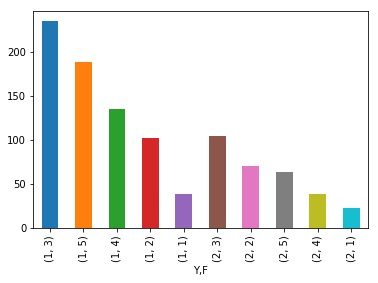

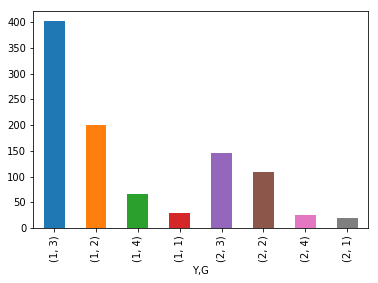

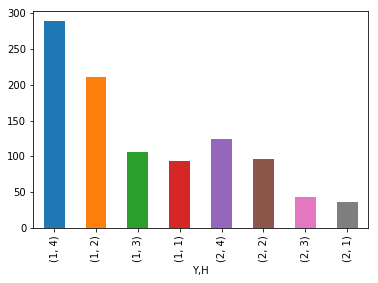

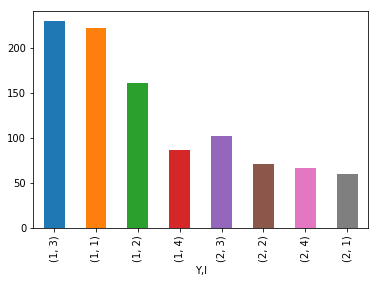

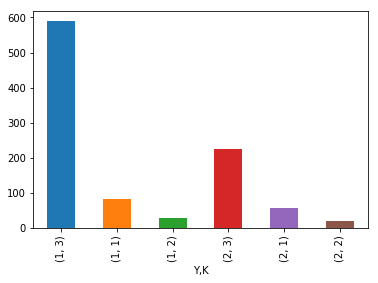

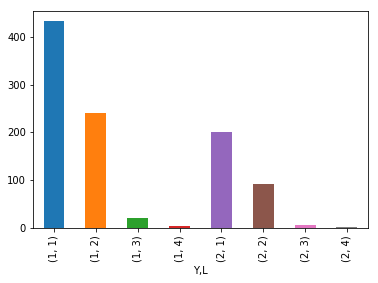

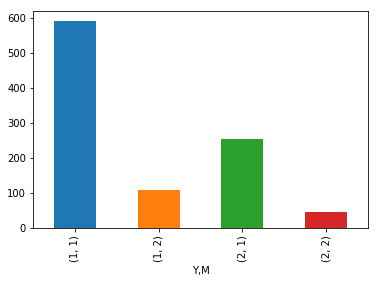

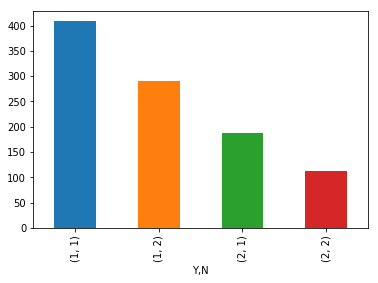

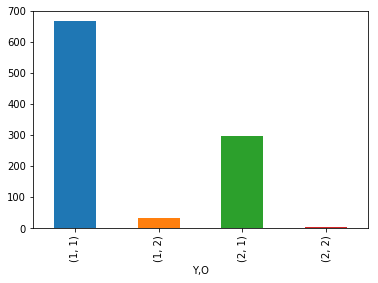

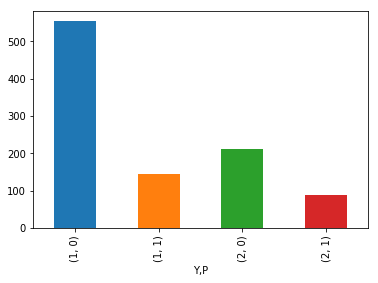

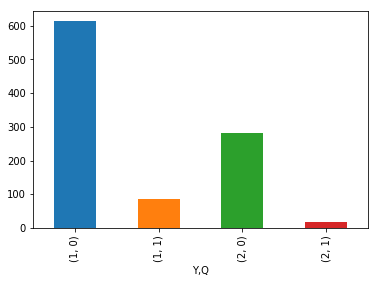

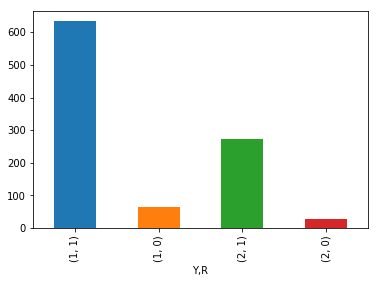

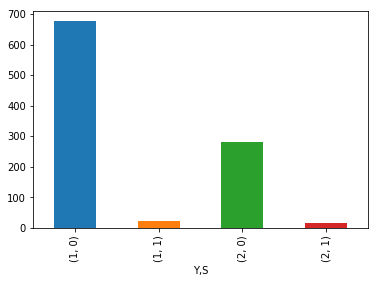

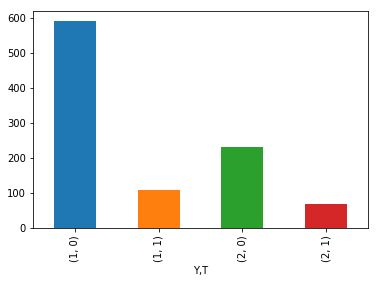

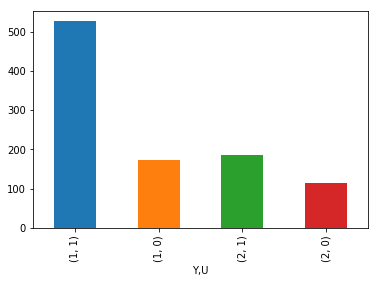

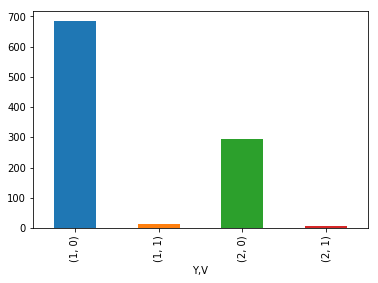

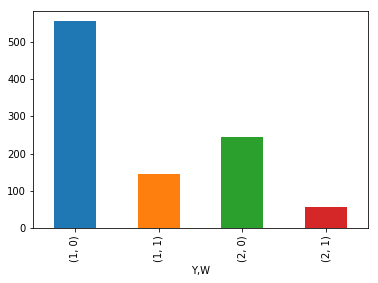

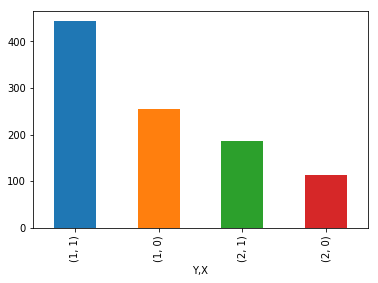

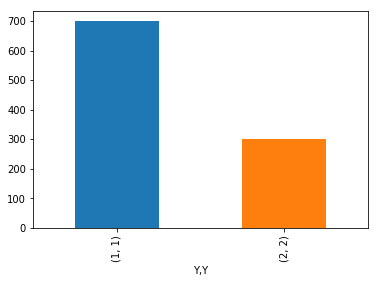

In [11]:
for i in categorical_cols:
    df[i].groupby(df['Y']).value_counts().plot(kind='bar')
    plt.show()

From analysis above it seems that there are a few categorical features that are indicative to the outcome (df['Y']). For example, feature 'A' vs 'Y' bar chart shows that there are much more (>7X) 'good' customers with characteristics of '4' (1,4), than 'bad' credit customers who has characteristics of '4' (2,4). This could be a differentiation factor later for ML classification. 

Another example would be feature 'C' vs 'Y' bar chart, where there are more than 2X 'good' customers with characteristics of '2' (1,2), than 'bad' credit customers who has characteristics of '2' (2,2). This could be a differentiation factor later for ML classification. 

Will include them in ML classification models

# K-mean clustering on numeric columns

I'll apply K-mean and GMM on the three originally numeric columns 'B', 'D' and 'J'

In [7]:
X_bd = df[['B','D']]
X_dj = df[['D', 'J']]
X_bj = df[['B','J']]
y = df['Y']

In [8]:
from sklearn.cluster import KMeans
# cluster of 2 was chosen because this is a classification problem.
def kmeans(X, clusters=2):
    km = KMeans(n_clusters=clusters)
    km.fit(X)
    y_pred = km.predict(X)
    centroids = km.cluster_centers_
    return (y_pred, centroids)

In [9]:
def kmean_plot(X, centroids, y_pred):
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred, label=None)
    plt.scatter(centroids[:,0], centroids[:,1], c='r', s=[100], label='centroids')
    plt.legend(loc='best')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

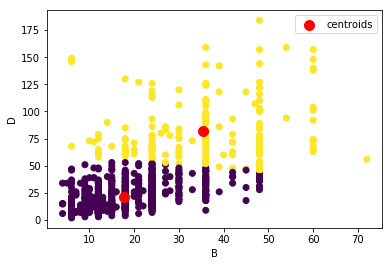

In [15]:
# For df['B'] and df['D'] kmean clustering:
y_pred_bd, centroids_bd = kmeans(X_bd,2)
kmean_plot(X_bd, centroids_bd, y_pred_bd)

The overall scatter plot show some up trend, but in terms of K-mean clustering, the division seems to be arbitrary. I'll compare the K-mean labels with the coutcome labels later.

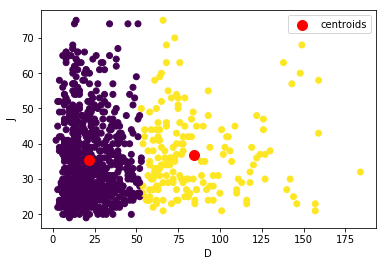

In [11]:
# For df['D'] and df['J'] kmean clustering:
y_pred_dj, centroids_dj = kmeans(X_dj,2)
kmean_plot(X_dj, centroids_dj, y_pred_dj)

The overall scatter plot show no trend. In terms of K-mean clustering, the division seems to be arbitrarily vertical. 

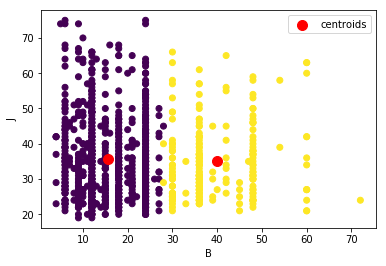

In [12]:
# For df['B'] and df['J'] kmean clustering:
y_pred_bj, centroids_bj = kmeans(X_bj,2)
kmean_plot(X_bj, centroids_bj, y_pred_bj)

The overall scatter plot show no trend. In terms of K-mean clustering, them division seems to be arbitrarily vertical. 

From the three kmean clustering, pick 'B' vs 'D' for crosstab analysis for output precision prediction

In [16]:
y_pred_bd = pd.DataFrame(y_pred_bd).replace({1:2, 0:1}).values
y_pred_bd = y_pred_bd.ravel()
pd.crosstab(y, y_pred_bd, colnames=['Pred'])

Pred,1,2
Y,,
1,597,103
2,220,80


In [18]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
precision_score(y, y_pred_bd)

0.7307221542227662

In [19]:
cm = confusion_matrix(y, y_pred_bd)
print('Total penalty: ', cm[0,1]*1+cm[1,0]*5)

Total penalty:  1203


#### The prediction using kmean clustering of 'B' and 'D', is not particularly good with precision score of 73.1% and total penalty of 1203. 

# GMM clustering on numeric columns

In [20]:
from sklearn.mixture import GaussianMixture
def gmm_clustering(X, clusters=2):
    gmm = GaussianMixture(n_components=clusters)
    gmm.fit(X)
    return gmm.predict(X)

In [21]:
# For df['B'] and df['D'] GMM clustering:
y_pred_bd = gmm_clustering(X_bd,2)
pd.crosstab(y, y_pred_bd, colnames=['Pred'])   

Pred,0,1
Y,,
1,536,164
2,179,121


In [25]:
# For df['D'] and df['J'] GMM clustering:
y_pred_dj = gmm_clustering(X_dj,2)
pd.crosstab(y, y_pred_dj, colnames=['Pred'])   

Pred,0,1
Y,,
1,567,133
2,206,94


In [26]:
# For df['B'] and df['J'] GMM clustering:
y_pred_bj = gmm_clustering(X_bj,2)
pd.crosstab(y, y_pred_bj, colnames=['Pred'])   

Pred,0,1
Y,,
1,587,113
2,207,93


From the three GMM clustering, pick 'B' vs 'D' for crosstab analysis for output prediction. Also compare GMM prediction to KMean prediction

In [29]:
y_pred_bd = pd.DataFrame(y_pred_bd).replace({1:2, 0:1}).values
y_pred_bd = y_pred_bd.ravel()
pd.crosstab(y, y_pred_bd, colnames=['Pred'])

Pred,1,2
Y,,
1,536,164
2,179,121


In [30]:
precision_score(y, y_pred_bd)

0.7496503496503496

In [31]:
cm = confusion_matrix(y, y_pred_bd)
print('Total penalty: ', cm[0,1]*1+cm[1,0]*5)

Total penalty:  1059


#### The prediction using GMM clustering of 'B' and 'D', is not particularly good with precision score of 75.0% and total penalty of 1059. GMM clustering model is slightly better than kmean clustering model for this dataset.

# Linear Regression analysis

#### From sns.pairplot chart above, generally speaking, there is no obvious pairs of features that show strong linear trend. From visual, it seems that feature 'B' and 'D' have some linear relationship. So here I'll do linear regression on feature 'B' and 'D' 

In [32]:
X = df[['B']]
y = df['D']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lin_rg = LinearRegression()
lin_rg.fit(X_train, y_train)
y_pred = lin_rg.predict(X_test)

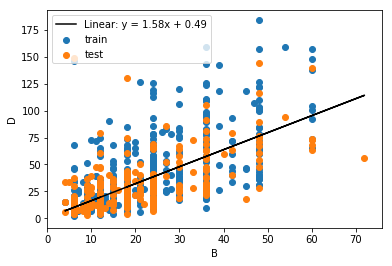

In [35]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_pred, c='k', label='Linear: y = {:.2f}x + {:.2f}'.format(lin_rg.coef_[0], lin_rg.intercept_))
plt.legend(loc='best')
plt.xlabel('B')
plt.ylabel('D')
plt.show()

In [38]:
from sklearn.metrics import r2_score, confusion_matrix
r2_score(y_test, y_pred)

0.3281053905409155

#### The linear regression model is: y = 1.58x + 0.49.
#### The R-sq score for the linear regression fitting is 0.33, not particularly good. But there is a general upper trending as 'B' and 'D' go up.
#### From german.doc description, it seems that 'B' represents checking account retentions in months, whereas 'D' represents saving account balances.
#### It makes sense that the longer the checking account retention time is, generally the more balance maintained on the saving account.

# Data preprocessing to fit ML classification models

As the first step to apply ML classification models, I'll include all features to fit and predict the output. This is to establish a baseline model performance

In [9]:
X, y = df.drop(['Y'],1), df['Y']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Standard scaling of all inputs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use tf.estimator

In [11]:
import tensorflow as tf

In [90]:
# cat_cols = [tf.feature_column.categorical_column_with_vocabulary_list(key, list(X[key].unique())) 
#             for key in X.select_dtypes(include=['category']).columns]
df[categorical_cols] = df[categorical_cols].astype('int64')
X, y = df.drop(['Y'],1), df['Y']

In [103]:
for col in X.columns:
    X[col] = (X[col]-X[col].mean())/X[col].std()

In [97]:
feat_cols = [tf.feature_column.numeric_column(key) for key in X.columns]

In [92]:
# X.apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [105]:
from sklearn.model_selection import train_test_split
# X.select_dtypes(include=['int64']).apply(lambda x: (x-x.min())/(x.max()-x.min()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
model = tf.estimator.LinearClassifier(feat_cols, optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp6pe_9q74', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a256bf390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [107]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=32, num_epochs=1000, shuffle=True)

In [108]:
model.train(input_func,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp6pe_9q74/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 205.563
INFO:tensorflow:loss = 19.718372, step = 101 (0.487 sec)
INFO:tensorflow:global_step/sec: 299.839
INFO:tensorflow:loss = 16.140318, step = 201 (0.336 sec)
INFO:tensorflow:global_step/sec: 290.956
INFO:tensorflow:loss = 15.124141, step = 301 (0.342 sec)
INFO:tensorflow:global_step/sec: 287.465
INFO:tensorflow:loss = 18.546558, step = 401 (0.350 sec)
INFO:tensorflow:global_step/sec: 284.719
INFO:tensorflow:loss = 16.88514, step = 501 (0.351 sec)
INFO:tensorflow:global_step/sec: 256.331
INFO:tensorflow:loss = 20.931847, step = 601 (0.390 sec)
INFO:tensorflow

INFO:tensorflow:loss = 14.047641, step = 8001 (0.372 sec)
INFO:tensorflow:global_step/sec: 246.962
INFO:tensorflow:loss = 14.329792, step = 8101 (0.408 sec)
INFO:tensorflow:global_step/sec: 284.168
INFO:tensorflow:loss = 19.147026, step = 8201 (0.351 sec)
INFO:tensorflow:global_step/sec: 275.125
INFO:tensorflow:loss = 14.946818, step = 8301 (0.364 sec)
INFO:tensorflow:global_step/sec: 277.695
INFO:tensorflow:loss = 22.663342, step = 8401 (0.360 sec)
INFO:tensorflow:global_step/sec: 288.624
INFO:tensorflow:loss = 23.163107, step = 8501 (0.346 sec)
INFO:tensorflow:global_step/sec: 288.823
INFO:tensorflow:loss = 12.276762, step = 8601 (0.348 sec)
INFO:tensorflow:global_step/sec: 278.692
INFO:tensorflow:loss = 19.276539, step = 8701 (0.358 sec)
INFO:tensorflow:global_step/sec: 266.556
INFO:tensorflow:loss = 14.050489, step = 8801 (0.376 sec)
INFO:tensorflow:global_step/sec: 286.359
INFO:tensorflow:loss = 21.736462, step = 8901 (0.347 sec)
INFO:tensorflow:global_step/sec: 277.005
INFO:tenso

In [109]:
eval_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=32, num_epochs=1, shuffle=False)

In [110]:
model.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-21-04:18:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp6pe_9q74/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-21-04:18:50
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.7366667, accuracy_baseline = 0.69666666, auc = 0.76796883, auc_precision_recall = 0.6106833, average_loss = 0.52273715, global_step = 10000, label/mean = 0.30333334, loss = 15.682114, precision = 0.5967742, prediction/mean = 0.2832928, recall = 0.4065934
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp6pe_9q74/model.ckpt-10000


{'accuracy': 0.7366667,
 'accuracy_baseline': 0.69666666,
 'auc': 0.76796883,
 'auc_precision_recall': 0.6106833,
 'average_loss': 0.52273715,
 'label/mean': 0.30333334,
 'loss': 15.682114,
 'precision': 0.5967742,
 'prediction/mean': 0.2832928,
 'recall': 0.4065934,
 'global_step': 10000}

### Use tf.estimator.DNNClassifier to fit model

In [111]:
model = tf.estimator.DNNClassifier([10,10,10,10],feat_cols,optimizer='Adam',dropout=0.4)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp_lj6dssn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a28798a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [112]:
model.train(input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp_lj6dssn/model.ckpt.
INFO:tensorflow:loss = 20.87218, step = 1
INFO:tensorflow:global_step/sec: 195.083
INFO:tensorflow:loss = 16.109598, step = 101 (0.516 sec)
INFO:tensorflow:global_step/sec: 305.398
INFO:tensorflow:loss = 22.873068, step = 201 (0.325 sec)
INFO:tensorflow:global_step/sec: 299.762
INFO:tensorflow:loss = 19.57165, step = 301 (0.336 sec)
INFO:tensorflow:global_step/sec: 294.158
INFO:tensorflow:loss = 20.696617, step = 401 (0.339 sec)
INFO:tensorflow:global_step/sec: 291.418
INFO:tensorflow:loss = 19.758965, step = 501 (0.341 sec)
INFO:tensorflow:global_step/sec: 301.01
INFO:tensorflow:loss = 21.067556, step = 601 (0.333 sec)
INFO:tensorflow:

In [113]:
model.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-21-04:21:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp_lj6dssn/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-21-04:21:55
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.69666666, accuracy_baseline = 0.69666666, auc = 0.5, auc_precision_recall = 0.65166664, average_loss = 0.61378014, global_step = 5000, label/mean = 0.30333334, loss = 18.413404, precision = 0.0, prediction/mean = 0.29630437, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp_lj6dssn/model.ckpt-5000


{'accuracy': 0.69666666,
 'accuracy_baseline': 0.69666666,
 'auc': 0.5,
 'auc_precision_recall': 0.65166664,
 'average_loss': 0.61378014,
 'label/mean': 0.30333334,
 'loss': 18.413404,
 'precision': 0.0,
 'prediction/mean': 0.29630437,
 'recall': 0.0,
 'global_step': 5000}

# Logistic Regression, DT, Random Forest, SVM, Naive Bayes, KNN

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [79]:
# build an sklearn estimator generic function to facilitate model training and evaluation

def train_evaluate(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    return (precision_score(y_test, y_pred), cm[0,1]*1+cm[1,0]*5)

In [80]:
log_r = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()

#### Logistic regression model (all features included):

In [81]:
prec, pen = train_evaluate(log_r, X_train, y_train, X_test, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.79 	 Total Penalty: 266.00


#### Decision tree model (all features included):

In [82]:
prec, pen = train_evaluate(dt, X_train, y_train, X_test, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.75 	 Total Penalty: 318.00


#### Random Forest model (all features included):

In [83]:
prec, pen = train_evaluate(rf, X_train, y_train, X_test, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.77 	 Total Penalty: 310.00


#### SVM model (all features included):

In [84]:
prec, pen = train_evaluate(svc, X_train, y_train, X_test, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.76 	 Total Penalty: 319.00


#### Gaussian Naive Bayes model (all features included):

In [85]:
prec, pen = train_evaluate(gnb, X_train, y_train, X_test, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.85 	 Total Penalty: 191.00


#### Bernoulli Naive Bayes model (all features included):

In [86]:
prec, pen = train_evaluate(bnb, X_train, y_train, X_test, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.79 	 Total Penalty: 261.00


#### KNN model (all features included):

In [87]:
prec, pen = train_evaluate(knn, X_train, y_train, X_test, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.75 	 Total Penalty: 332.00


#### The best model is Gaussian Naive Bayes. But there is no hyper parameters to tune for GaussianNB. The second best model is Bernoulli Naive Bayes. The third best model is Logistic Regression model. Run hyperparameter tunning for Bernoulli Naive Bayes and Logistic Regression model using GridSearchCV.

In [88]:
from sklearn.model_selection import GridSearchCV
param_bnb = dict(alpha=np.linspace(0,2,10)[1:], binarize=np.linspace(0,2,10))
bnb_grid = GridSearchCV(estimator=bnb, param_grid=param_bnb, cv=10, scoring='precision')
bnb_grid.fit(X_train, y_train)
y_pred = bnb_grid.best_estimator_.predict(X_test)
print("precision: ",precision_score(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("total penalties: ", cm[0,1]+5*cm[1,0])

precision:  0.7973568281938326
accuracy:  0.7533333333333333
[[181  28]
 [ 46  45]]
total penalties:  258


#### Hyperparameter tuning for BernoulliNB does not lead to significant improvements on precision. 

#### Try tuning on Logistic Regression instead

In [89]:
# use higher weight to impose penalties on false positives.
class_weight = [None,'balanced',{1:1, 2:1},{1:1, 2:2},{1:1, 2:3},{1:1, 2:4},{1:1, 2:5}]

In [90]:
# define a custom scoring function of penalty as the metric to drive for gridsearch
def my_scorer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    penalty = cm[0,1]*1 + cm[1,0]*5
    return penalty

from sklearn.metrics import make_scorer
my_func = make_scorer(my_scorer, greater_is_better=False)

#### For hyperparameters the gridsearch include L1 L2 for model penalty, models for solver, different class weights (FP is much severe than FN)
#### L1 regularization is not support for some solver models such as newton-cg, sag and lbfgs. There fore there are two dicts in the hyperparameter list

In [91]:
param_range = [0.001,0.01,0.1,1,10,100,1000]
param_grid = [{'penalty': ['l1', 'l2'], 'C': param_range, 'solver': ['liblinear', 'saga'], 'class_weight': class_weight},
          {'penalty': ['l2'], 'C': param_range, 'solver': ['newton-cg','sag', 'lbfgs'], 'class_weight': class_weight}]
log_r_grid = GridSearchCV(log_r, param_grid, scoring=my_func, cv=10)
log_r_grid.fit(X_train, y_train)
y_pred = log_r_grid.best_estimator_.predict(X_test)
print("="*50)
print("precision: ",precision_score(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("total penalties: ", cm[0,1]+5*cm[1,0])
print("="*50)

/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: T

/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: T

/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: T

precision:  0.9306930693069307
accuracy:  0.5933333333333334
total penalties:  150


/anaconda3/envs/base_py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [92]:
log_r_grid.best_estimator_

LogisticRegression(C=0.01, class_weight={1: 1, 2: 5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [93]:
log_r_grid.best_params_

{'C': 0.01, 'class_weight': {1: 1, 2: 5}, 'penalty': 'l2', 'solver': 'saga'}

#### from gridsearch above it shows that use 'balanced' class_weight, 'L2' regularization and 'liblinear' solver gives the best combined results for least penalties. The result is:

### Precision = 93.1%, Accuracy = 59.3%, Total Penalties = 150

# Optimize the model further by gridsearch best PCA component and linear regression hyperparameters.

In [94]:
# from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [95]:
def pca_fit_best_model(n_component, estimator, X_train, y_train, X_test, y_test):
    pca = PCA(n_components=n_component)
    X_train_ = pca.fit_transform(X_train)
    X_test_ = pca.transform(X_test)
    
    param_grid = [{'penalty': ['l1', 'l2'], 'C': param_range, 'solver': ['liblinear', 'saga'], 'class_weight': ['balanced']},
              {'penalty': ['l2'], 'C': param_range, 'solver': ['newton-cg','sag', 'lbfgs'], 'class_weight': ['balanced']}]
    estimator_grid = GridSearchCV(estimator, param_grid, scoring=my_func, cv=10)
    estimator_grid.fit(X_train_, y_train)
    y_pred = estimator_grid.best_estimator_.predict(X_test_)
    print('='*50)
    print("n_components: ", n_component)
    print("precision: ",precision_score(y_test, y_pred))
    print("accuracy: ",accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("total penalties: ", cm[0,1]+5*cm[1,0])
    print('='*50)

loop over features of 4 to features of 24 (full features) to find the best model with least penalty. Here I only used class_weight = 'balanced' because it was found to be the best parameter from previous gridsearch


In [96]:
for n in range(4, 25):
    pca_fit_best_model(n, log_r, X_train, y_train, X_test, y_test)

n_components:  4
precision:  0.8074534161490683
accuracy:  0.6333333333333333
total penalties:  234
n_components:  5
precision:  0.8074534161490683
accuracy:  0.6333333333333333
total penalties:  234
n_components:  6
precision:  0.83125
accuracy:  0.6566666666666666
total penalties:  211
n_components:  7
precision:  0.9006211180124224
accuracy:  0.7333333333333333
total penalties:  144
n_components:  8
precision:  0.896774193548387
accuracy:  0.7133333333333334
total penalties:  150
n_components:  9
precision:  0.8974358974358975
accuracy:  0.7166666666666667
total penalties:  149
n_components:  10
precision:  0.8987341772151899
accuracy:  0.7233333333333334
total penalties:  147
n_components:  11
precision:  0.8846153846153846
accuracy:  0.7033333333333334
total penalties:  161
n_components:  12
precision:  0.896774193548387
accuracy:  0.7133333333333334
total penalties:  150
n_components:  13
precision:  0.896774193548387
accuracy:  0.7133333333333334
total penalties:  150
n_componen

#### Best model after pca and gridsearch iterations:

n_components:  7

precision:  0.9006211180124224

accuracy:  0.7333333333333333

total penalties:  144

In [97]:
# apply the gridsearch again with n_component = 9 to confirm the model
pca = PCA(n_components=7)
X_train_ = pca.fit_transform(X_train)
X_test_ = pca.transform(X_test)
class_weight = ['balanced']
param_grid = [{'penalty': ['l1', 'l2'], 'C': param_range, 'solver': ['liblinear', 'saga'], 'class_weight': class_weight},
          {'penalty': ['l2'], 'C': param_range, 'solver': ['newton-cg','sag', 'lbfgs'], 'class_weight': class_weight}]
log_r_grid = GridSearchCV(log_r, param_grid, scoring=my_func, cv=10)
log_r_grid.fit(X_train_, y_train)
y_pred = log_r_grid.best_estimator_.predict(X_test_)
print("="*50)
print("precision: ",precision_score(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("total penalties: ", cm[0,1]+5*cm[1,0])
print("="*50)

precision:  0.8980891719745223
accuracy:  0.72
total penalties:  148


### It is thus confirmed that using PCA n_component = 7 the best logistic regression model can give above precision, accuracy and total pentalties

In [98]:
# find how much variances explained when n_component = 7
pca.explained_variance_ratio_[:].cumsum()

array([0.1060096 , 0.19563608, 0.27148563, 0.34494156, 0.41272181,
       0.46742093, 0.51741929])

In [99]:
log_r_grid.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'penalty': 'l2',
 'solver': 'liblinear'}

#### Use n_components=7 PCA dimension-reduced data,  here I'll fit to other classification models to see where the other models performances are (as the baseline). 
#### This can also help to see if dimension reduction would help other models as well.

In [102]:
prec, pen = train_evaluate(dt, X_train_, y_train, X_test_, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.77 	 Total Penalty: 289.00


In [103]:
prec, pen = train_evaluate(rf, X_train_, y_train, X_test_, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.75 	 Total Penalty: 338.00


In [104]:
prec, pen = train_evaluate(svc, X_train_, y_train, X_test_, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.77 	 Total Penalty: 303.00


In [106]:
prec, pen = train_evaluate(gnb, X_train_, y_train, X_test_, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.77 	 Total Penalty: 304.00


In [107]:
prec, pen = train_evaluate(bnb, X_train_, y_train, X_test_, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.75 	 Total Penalty: 338.00


In [109]:
prec, pen = train_evaluate(knn, X_train_, y_train, X_test_, y_test)
print('Precision: {:.2f} \t Total Penalty: {:.2f}'.format(prec, pen))

Precision: 0.80 	 Total Penalty: 252.00


Compared to full featured models previously, reducing features from full 24 to 7 does not seems to improve or impair baseline model performances.

Therefore it seems to be a solid step to reduce dimensions from 24 to 7 by PCA.

Performances of these baseline model is far worse than the best logistic regression model that is tuned for least penalties, best precisions, and OK accuracies.

## The final, best logistic regression model reduced total *24* features to 7 dimensions with maintained variances of *52%*. With this model, precision can be reached at *90%*, accuracy is *72%*, total penalties is *148*

